In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import spikeinterface.full as si
from pathlib import Path

import matplotlib.pyplot as plt
import probeinterface as pi
import probeinterface.plotting

In [6]:
base_folder = Path('/nas/Cambridge_Recordings/Test_Data_troubleshoot/Recordings/')

# data_folder = base_folder / 'Test_Data_troubleshoot/2023-08-23_15-56-05'
data_folder = base_folder / '2023-08-23_15-56-05/'


In [7]:
full_rec = si.read_openephys(data_folder,  stream_name='Record Node 101#Acquisition_Board-100.Rhythm Data', block_index = 0)
full_rec

OpenEphysBinaryRecordingExtractor: 72 channels - 30.0kHz - 1 segments - 40,316,100 samples 
                                   1,343.87s (22.40 minutes) - int16 dtype - 5.41 GiB

In [8]:
full_rec.channel_ids

array(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9',
       'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'CH17',
       'CH18', 'CH19', 'CH20', 'CH21', 'CH22', 'CH23', 'CH24', 'CH25',
       'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32', 'CH33',
       'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40', 'CH41',
       'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47', 'CH48', 'CH49',
       'CH50', 'CH51', 'CH52', 'CH53', 'CH54', 'CH55', 'CH56', 'CH57',
       'CH58', 'CH59', 'CH60', 'CH61', 'CH62', 'CH63', 'CH64', 'ADC1',
       'ADC2', 'ADC3', 'ADC4', 'ADC5', 'ADC6', 'ADC7', 'ADC8'],
      dtype='<U64')

In [9]:
raw_rec_no_probe = full_rec.channel_slice(channel_ids=full_rec.channel_ids[:64])
raw_rec_no_probe

ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 40,316,100 samples 
                       1,343.87s (22.40 minutes) - int16 dtype - 4.81 GiB

In [10]:
%matplotlib widget
si.plot_traces(raw_rec_no_probe, mode='line', backend='ipywidgets')

AppLayout(children=(VBox(children=(FloatSlider(value=0.0, continuous_update=False, description='time:', layout…

In [11]:
probe = probeinterface.get_probe('cambridgeneurotech', 'ASSY-236-H5')
probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
probe


cambridgeneurotech - ASSY-236-H5 - 64ch - 1shanks

In [13]:
probe_information = probe.to_dataframe()
probe_information.to_csv('CN_probe_info.xls')


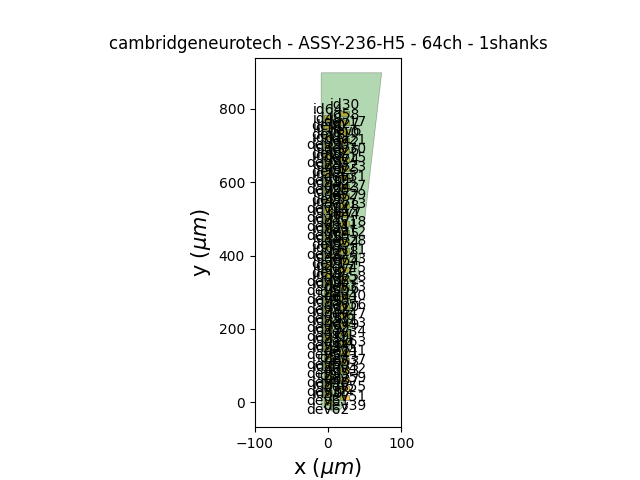

In [33]:
fig, ax = plt.subplots()
pi.plotting.plot_probe(probe, with_contact_id=True, with_device_index=True, ax=ax)
ax.set_xlim(-100, 100)
ax.set_aspect(aspect=0.5)

In [14]:
raw_rec = raw_rec_no_probe.set_probe(probe)

In [16]:
rec_probe = raw_rec.get_probe().to_dataframe()
rec_probe.to_csv('CN_probe_info_rec.xls')


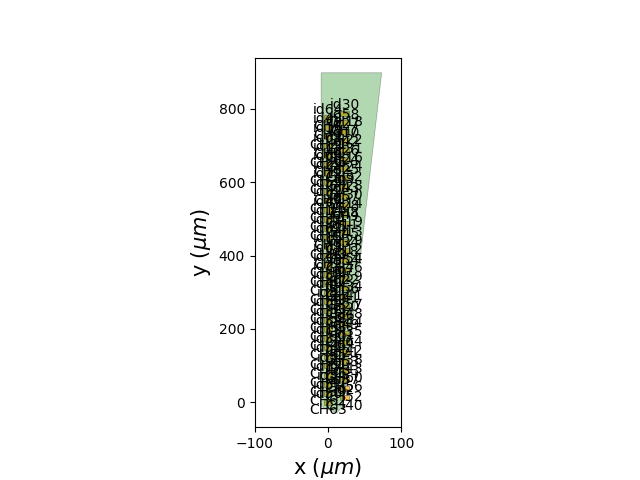

In [26]:
fig, ax = plt.subplots()
si.plot_probe_map(raw_rec, with_channel_ids=True, with_contact_id=True, ax=ax)

ax.set_xlim(-100, 100)
ax.set_aspect(aspect=0.5)

In [53]:
raw_rec.channel_ids

array(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9',
       'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'CH17',
       'CH18', 'CH19', 'CH20', 'CH21', 'CH22', 'CH23', 'CH24', 'CH25',
       'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32', 'CH33',
       'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40', 'CH41',
       'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47', 'CH48', 'CH49',
       'CH50', 'CH51', 'CH52', 'CH53', 'CH54', 'CH55', 'CH56', 'CH57',
       'CH58', 'CH59', 'CH60', 'CH61', 'CH62', 'CH63', 'CH64'],
      dtype='<U64')

In [27]:
# plotting order_channel_by_depth or not is important

%matplotlib widget
si.plot_traces(raw_rec, mode='map', backend='ipywidgets', order_channel_by_depth=True)

AppLayout(children=(VBox(children=(FloatSlider(value=0.0, continuous_update=False, description='time:', layout…

In [55]:
# for ephyviewer order channels

order_f, order_b = si.order_channels_by_depth(raw_rec)
order_f

channel_order_ids = raw_rec.channel_ids[order_f]
channel_order_ids

raw_rec_ordered = raw_rec.channel_slice(channel_order_ids)
raw_rec_ordered.channel_ids

array(['CH63', 'CH40', 'CH62', 'CH52', 'CH39', 'CH56', 'CH47', 'CH60',
       'CH36', 'CH43', 'CH61', 'CH38', 'CH55', 'CH42', 'CH45', 'CH64',
       'CH50', 'CH35', 'CH53', 'CH44', 'CH58', 'CH48', 'CH33', 'CH57',
       'CH49', 'CH41', 'CH51', 'CH34', 'CH37', 'CH59', 'CH10', 'CH46',
       'CH2', 'CH54', 'CH23', 'CH12', 'CH3', 'CH29', 'CH17', 'CH13',
       'CH25', 'CH19', 'CH11', 'CH8', 'CH15', 'CH14', 'CH6', 'CH30',
       'CH27', 'CH28', 'CH20', 'CH32', 'CH5', 'CH24', 'CH26', 'CH16',
       'CH4', 'CH31', 'CH21', 'CH22', 'CH9', 'CH7', 'CH1', 'CH18'],
      dtype='<U64')

In [56]:
raw_rec.channel_ids

array(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9',
       'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'CH17',
       'CH18', 'CH19', 'CH20', 'CH21', 'CH22', 'CH23', 'CH24', 'CH25',
       'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32', 'CH33',
       'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40', 'CH41',
       'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47', 'CH48', 'CH49',
       'CH50', 'CH51', 'CH52', 'CH53', 'CH54', 'CH55', 'CH56', 'CH57',
       'CH58', 'CH59', 'CH60', 'CH61', 'CH62', 'CH63', 'CH64'],
      dtype='<U64')

In [220]:
# preprocessing

# rec = si.depth_order(raw_rec)
rec_filter = si.bandpass_filter(raw_rec, freq_min=300., freq_max=6000.)
# rec_filter = si.common_reference(rec_filter, reference='local', operator='median')
rec_filter

# rec2 = si.bandpass_filter(raw_rec, freq_min=500., freq_max=7000.)





BandpassFilterRecording: 64 channels - 30.0kHz - 1 segments - 39,117,900 samples 
                         1,303.93s (21.73 minutes) - int16 dtype - 4.66 GiB

In [221]:
# %matplotlib widget


# si.plot_traces(rec_filter, mode='map', backend='matplotlib', order_channel_by_depth=True)

In [222]:
import numpy as np

In [227]:
for i in range(5):
    bad_channel_ids, channel_labels = si.detect_bad_channels(rec_filter, method="coherence+psd",
                                                            chunk_duration_s=.5,
                                                            num_random_chunks=100,)# , seed=1991)
# bad_channel_ids, channel_labels = si.detect_bad_channels(rec_filter, std_mad_threshold=5, noisy_channel_threshold=2, method="neighborhood_r2")
    print(sorted(bad_channel_ids), bad_channel_ids.size)
    print(np.unique(channel_labels, return_counts=True))
# print(channel_labels)


#  no depth order ['CH1' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH57' 'CH64']
# with depth order ['CH60' 'CH64' 'CH57' 'CH59' 'CH2' 'CH3' 'CH8' 'CH6' 'CH5' 'CH4' 'CH7' 'CH1']

# ['CH60', 'CH64', 'CH58', 'CH57', 'CH3', 'CH2', 'CH8', 'CH6', 'CH5', 'CH4', 'CH7', 'CH1']


['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH57', 'CH58', 'CH59', 'CH6', 'CH60', 'CH61', 'CH64', 'CH7', 'CH8'] 14
(array(['dead', 'good'], dtype='<U5'), array([14, 50]))
['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH57', 'CH59', 'CH6', 'CH60', 'CH61', 'CH64', 'CH7', 'CH8'] 13
(array(['dead', 'good'], dtype='<U5'), array([13, 51]))
['CH1', 'CH3', 'CH4', 'CH5', 'CH57', 'CH59', 'CH6', 'CH60', 'CH61', 'CH64', 'CH7', 'CH8'] 12
(array(['dead', 'good'], dtype='<U5'), array([12, 52]))
['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH57', 'CH59', 'CH6', 'CH60', 'CH61', 'CH64', 'CH7', 'CH8'] 13
(array(['dead', 'good'], dtype='<U5'), array([13, 51]))
['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH57', 'CH58', 'CH59', 'CH6', 'CH60', 'CH61', 'CH64', 'CH7', 'CH8'] 14
(array(['dead', 'good'], dtype='<U5'), array([14, 50]))


In [205]:
print(sorted(['CH60', 'CH64', 'CH58', 'CH57', 'CH3', 'CH2', 'CH8', 'CH6', 'CH5', 'CH4', 'CH7', 'CH1']))
print(len(sorted(['CH60', 'CH64', 'CH58', 'CH57', 'CH3', 'CH2', 'CH8', 'CH6', 'CH5', 'CH4', 'CH7', 'CH1'])))

['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH57', 'CH58', 'CH6', 'CH60', 'CH64', 'CH7', 'CH8']
12


In [125]:
out_ids = rec.channel_ids[channel_labels == 'out']
dead_ids = rec.channel_ids[channel_labels == 'dead']
print(out_ids)
print(dead_ids)


['CH63' 'CH47' 'CH36' 'CH35' 'CH58' 'CH48']
['CH45' 'CH27']


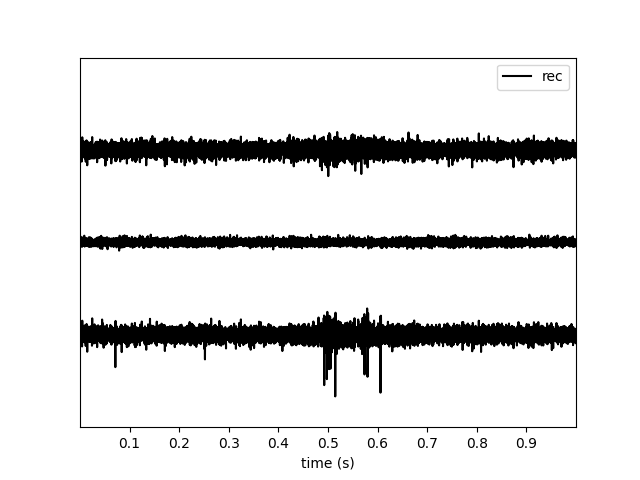

In [61]:
%matplotlib widget

si.plot_traces(rec, mode='line', backend='matplotlib', order_channel_by_depth=True, channel_ids=out_ids)

In [66]:
manual_bad_ids = ['CH60', 'CH64', 'CH58', 'CH57', 'CH3', 'CH2', 'CH8', 'CH6', 'CH5', 'CH4', 'CH7', 'CH1']
manual_bad_ids

['CH60',
 'CH64',
 'CH58',
 'CH57',
 'CH3',
 'CH2',
 'CH8',
 'CH6',
 'CH5',
 'CH4',
 'CH7',
 'CH1']

In [111]:

rec = raw_rec.remove_channels(manual_bad_ids)
# rec.channel_ids
# rec = raw_rec_ordered.channel_slice(raw_rec_ordered.channel_ids[::2])

rec = si.bandpass_filter(rec, freq_min=300., freq_max=6000.)
rec = si.common_reference(rec, reference='global', operator='median')
rec.channel_ids


array(['CH9', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16',
       'CH17', 'CH18', 'CH19', 'CH20', 'CH21', 'CH22', 'CH23', 'CH24',
       'CH25', 'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32',
       'CH33', 'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40',
       'CH41', 'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47', 'CH48',
       'CH49', 'CH50', 'CH51', 'CH52', 'CH53', 'CH54', 'CH55', 'CH56',
       'CH59', 'CH61', 'CH62', 'CH63'], dtype='<U64')

In [112]:
%matplotlib widget

si.plot_traces(rec, mode='map', time_range=(20, 20.01), backend='ipywidgets', order_channel_by_depth=True)

AppLayout(children=(VBox(children=(FloatSlider(value=20.0, continuous_update=False, description='time:', layou…

In [31]:
test = si.depth_order(raw_rec)

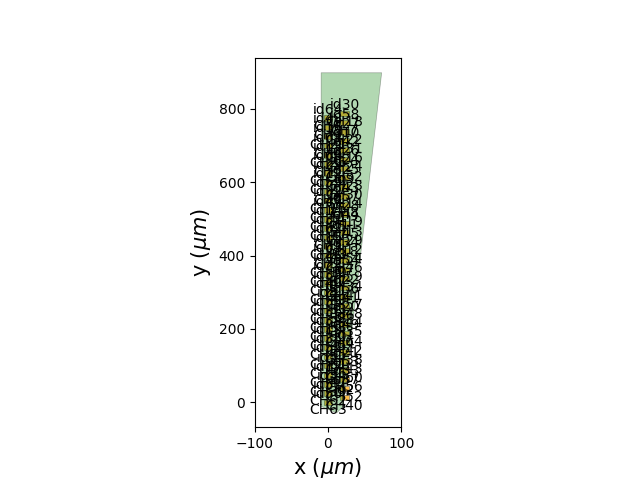

In [32]:
fig, ax = plt.subplots()
si.plot_probe_map(test, with_channel_ids=True, with_contact_id=True, ax=ax)

ax.set_xlim(-100, 100)
ax.set_aspect(aspect=0.5)